### Contruindo gráficos a partir de banco de dados

In [3]:
import sqlite3
import random
import time
import datetime

import matplotlib.pyplot as plt

# conexão
conn = sqlite3.connect('arquivos/banco.db')

# cursor
c = conn.cursor()

# criando tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'product_name TEXT, value REAL)')
    
# inserindo dados
def data_insert():
    c.execute("INSERT INTO produtos VALUES ('2022-01-01 12:50:21', 'Teclado', 130.00)")
    
    # commitando alterações
    conn.commit()
    
    # fechando o cursor
    c.close()
    
    # fechando a conexão
    conn.close()

def data_insert_var():
    new_date = datetime.datetime.now()
    new_product_name = 'Mouse'
    new_value = random.randrange(50, 100)
    c.execute('INSERT INTO produtos (date, product_name, value) VALUES (?, ?, ?)', (new_date, new_product_name, new_value))
    
    # commitando alterações
    conn.commit() 

# leitura de dados    
def leitura_todos_dados():
    c.execute('SELECT * FROM produtos')
    for row in c.fetchall():
        print(row)
        
# leitura de colunas especificas
def leitura_registros():
    c.execute('SELECT * FROM produtos WHERE value > 60.0' )
    for row in c.fetchall():
        print(row)

# apenas ultima coluna
def leitura_colunas():
    c.execute('SELECT * FROM produtos' )
    for row in c.fetchall():
        # row[0] = id
        # row[1] = date
        # row[2] = product_name
        # row[3] = value
        print(row[3])

# atualizando dados        
def atualiza_dados():
    c.execute('UPDATE produtos SET value = 70.00 WHERE value > 90.0')
    conn.commit()
    
# deletando dados
def remove_dados():
    c.execute('DELETE FROM produtos WHERE value = 88.0')
    conn.commit()   

# grafico
def dados_grafico():
    c.execute('SELECT id, value FROM produtos')
    ids =[]
    valores = []
    dados = c.fetchall()
    for row in dados:
        ids.append(row[0])
        valores.append(row[1])
    
    plt.bar(ids, valores)
    plt.show()    

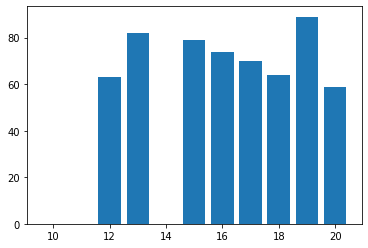

In [4]:
# geração de gráficos
dados_grafico()

### FIM